In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image



from tensorflow import keras
from tensorflow.keras import layers 

C:\Users\USER\.conda\envs\tf-gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\USER\.conda\envs\tf-gpu\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\USER\.conda\envs\tf-gpu\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data_train_path = r'C:\Users\USER\Desktop\Layan\Numbered Frames\Training'
#data_validation_path=r'C:\Users\layan\OneDrive\Documents\AI\validation'
data_test_path= r'C:\Users\USER\Desktop\Layan\Numbered Frames\Testing'

In [3]:
size = 224
width=224;
height=224;
batch_size = 64

In [4]:
# Define the target size as a tuple
target_size = (width, height)  # Replace 'width' and 'height' with your desired dimensions

# Create the image data generator
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    # Add other preprocessing options as needed
    
)

# Create the data generator
data_generator = image_data_generator.flow_from_directory(
    r'C:\Users\USER\Desktop\Layan\Numbered Frames\Training',
    
    target_size=target_size,  # Pass the tuple as the target_size parameter
    batch_size=batch_size,
    class_mode='categorical'  # Set to 'categorical' if you have multiple classes
)


Found 0 images belonging to 0 classes.


In [5]:

# Load the data
df = pd.read_csv(r"C:\Users\USER\Desktop\Layan\TrainingLabels.csv")


In [6]:
x=df[["id"]].values

In [7]:
y=df[["Classification"]].values

In [8]:
data_train = dict(
    
    directory=r'C:\Users\USER\Desktop\Layan\Numbered Frames\Training',
    x_col="image_name",
    y_col="Classification",
    weight_col=None,
    target_size=(size, size),
    color_mode='rgb',
    class_mode="raw",
    batch_size=batch_size,
    shuffle=True,
   
    seed=0,
)

In [9]:
df['image_name'] = df['id'].map('seq_{:06d}.jpg'.format)

In [10]:
df.describe()

,id
count,1600.00000
mean,1200.50000
std,462.02453
min,401.00000
25%,800.75000
50%,1200.50000
75%,1600.25000
max,2000.00000


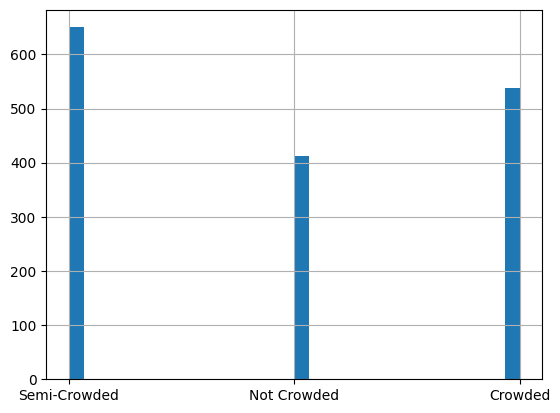

In [11]:
df['Classification'].hist(bins=30);

In [12]:
from tensorflow.keras import layers, models

In [13]:
# Initialize lists to store image data and labels
X_train_list = []
Y_train_list = []

# Load CSV data
csv_data1 = pd.read_csv(r"C:\Users\USER\Desktop\Layan\TrainingLabels.csv")
image_dir = r'C:\Users\USER\Desktop\Layan\Numbered Frames\Training'

# Iterate over each row in the CSV data
for index, row in csv_data1.iterrows():
    #print(f"Processing row {index + 1}")
    # Construct image file path with padded integer part starting from 401
    image_filename = f'seq_{index + 401:06d}.jpg'
    image_path = os.path.join(image_dir, image_filename)

    # Check if the image file exists
    if not os.path.exists(image_path):
        print(f"Image file '{image_path}' not found. Skipping.")
        continue

    # Load image and convert to array
    image = Image.open(image_path)
    image_array = np.array(image)

    # Append image array to X_train_list
    X_train_list.append(image_array)
    
    # Append classification label to Y_train_list
    Y_train_list.append(row['Classification'])

    if index == 1599:  # Assuming there are 1600 rows in the CSV
        print("Loop completed all iterations.")

# Convert lists to NumPy arrays
X_train = np.array(X_train_list)
Y_train = np.array(Y_train_list)

#print("Number of images in X_train:", len(X_train))


Loop completed all iterations.


In [14]:
X_train.shape

(1600, 480, 640, 3)

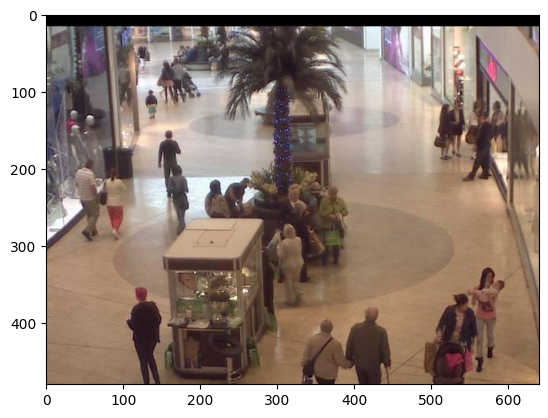

In [15]:
plt.imshow(X_train[1])

In [16]:
Y_train[:10]

array(['Semi-Crowded', 'Semi-Crowded', 'Semi-Crowded', 'Not Crowded',
       'Not Crowded', 'Semi-Crowded', 'Semi-Crowded', 'Semi-Crowded',
       'Semi-Crowded', 'Crowded'], dtype='<U12')

In [17]:
Y_train.shape

(1600,)

In [18]:
Y_train=Y_train.reshape(-1,)


In [19]:
classes = ['Not Crowded', 'Semi-Crowded', 'Crowded']

In [20]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[index])
    plt.xlabel((y[index]))

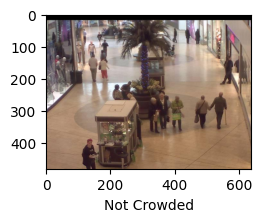

In [21]:
plot_sample(X_train, Y_train, 4)


In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels to numerical values
Y_train = label_encoder.fit_transform(Y_train)

# Print the encoded labels
print("Encoded Labels:", Y_train)


Encoded Labels: [2 2 2 ... 1 1 1]


In [23]:
Y_train[0:40]

array([2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
X_train=X_train/255 #for normalizing

In [25]:
# Initialize lists to store image data and labels
X_test_list = []
Y_test_list = []

# Load CSV data for testing
csv_data_test = pd.read_csv(r"C:\Users\USER\Desktop\Layan\TestingLabels.csv")  # Assuming different CSV for testing
image_dir_test = r'C:\Users\USER\Desktop\Layan\Numbered Frames\Testing'  # Change the directory path for testing images

# Iterate over each row in the CSV data for testing
for index, row in csv_data_test.iterrows():
    if index >= 400:
        break  # Stop the loop when index reaches 400
        
    # Construct image file path with padded integer part starting from 1
    image_filename = f'seq_{index + 1:06d}.jpg'  # Start index from 1 for testing
    image_path = os.path.join(image_dir_test, image_filename)

    # Check if the image file exists
    if not os.path.exists(image_path):
        print(f"Image file '{image_path}' not found. Skipping.")
        continue

    # Load image and convert to array
    image = Image.open(image_path)
    image_array = np.array(image)

    # Append image array to X_test_list
    X_test_list.append(image_array)
    
    # Append classification label to Y_test_list
    Y_test_list.append(row['Classification'])

# Convert lists to NumPy arrays
X_test = np.array(X_test_list)
Y_test = np.array(Y_test_list)


In [26]:
Y_test[:10]

array(['Crowded', 'Crowded', 'Crowded', 'Crowded', 'Crowded', 'Crowded',
       'Crowded', 'Crowded', 'Semi-Crowded', 'Not Crowded'], dtype='<U12')

In [27]:
Y_test.shape

(400,)

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels to numerical values
Y_test= label_encoder.fit_transform(Y_test)

# Print the encoded labels
#print("Encoded Labels:", Y_test)


In [29]:
Y_test[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 1], dtype=int64)

In [30]:
X_test=X_test/255 #for normalizing

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn = Sequential([
    # CNN layers
    # First Convolutional Layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Second Convolutional Layer
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),  # Removed input_shape
    MaxPooling2D((2, 2)),
    
    # Dense layers
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [32]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
# Train the model
cnn.fit(X_train, Y_train, epochs=20,validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 21s 291ms/step - loss: 5.6948 - accuracy: 0.3562 - val_loss: 0.9721 - val_accuracy: 0.6313
Epoch 2/20
40/40 [==============================] - 6s 150ms/step - loss: 0.8139 - accuracy: 0.6336 - val_loss: 0.7681 - val_accuracy: 0.6281
Epoch 3/20
40/40 [==============================] - 6s 151ms/step - loss: 0.5100 - accuracy: 0.8102 - val_loss: 0.7276 - val_accuracy: 0.7031
Epoch 4/20
40/40 [==============================] - 6s 146ms/step - loss: 0.3277 - accuracy: 0.8875 - val_loss: 0.7184 - val_accuracy: 0.6219
Epoch 5/20
40/40 [==============================] - 6s 149ms/step - loss: 0.1924 - accuracy: 0.9453 - val_loss: 0.7987 - val_accuracy: 0.5781
Epoch 6/20
40/40 [==============================] - 6s 147ms/step - loss: 0.1297 - accuracy: 0.9680 - val_loss: 0.6370 - val_accuracy: 0.7188
Epoch 7/20
40/40 [==============================] - 6s 146ms/step - loss: 0.1258 - accuracy: 0.9711 - val_loss: 0.7219 - val_accuracy: 0.7125
Epoch

In [34]:
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
#### from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
# Predict probabilities
Y_predict_prob = cnn.predict(X_test)

# Convert probabilities to class labels
Y_predict = np.argmax(Y_predict_prob, axis=1)

# Calculate mean absolute error
mae = mean_absolute_error(Y_test, Y_predict)
print(f'MAE: {mae}')

# Calculate accuracy
accuracy = 100 * (1 - (mae / Y_test.mean()))
print(f'Accuracy: {accuracy:.1f}%')

# Evaluate loss
loss = cnn.evaluate(X_test, Y_test)[0]
print(f'Loss: {loss:.1f}')

print("Classification Report: \n", classification_report(Y_test, Y_predict))


13/13 [==============================] - 2s 99ms/step
MAE: 0.4125
Accuracy: 59.5%
13/13 [==============================] - 1s 50ms/step - loss: 0.8173 - accuracy: 0.7425
Loss: 0.8
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       152
           1       0.81      0.71      0.75        89
           2       0.66      0.72      0.69       159

    accuracy                           0.74       400
   macro avg       0.76      0.74      0.75       400
weighted avg       0.75      0.74      0.74       400



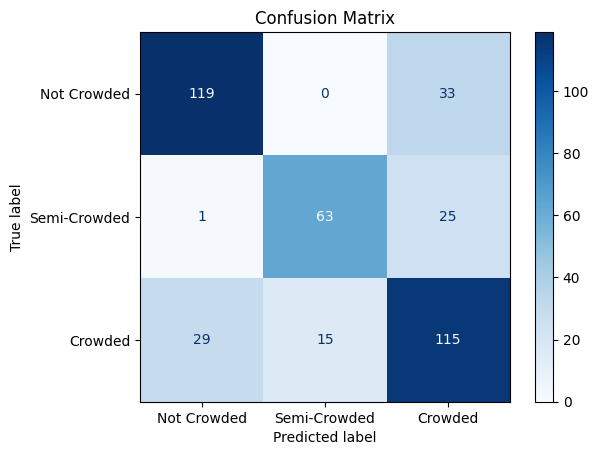

In [35]:
import matplotlib.pyplot as plt


cm = confusion_matrix(Y_test, Y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Crowded', 'Semi-Crowded', 'Crowded'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

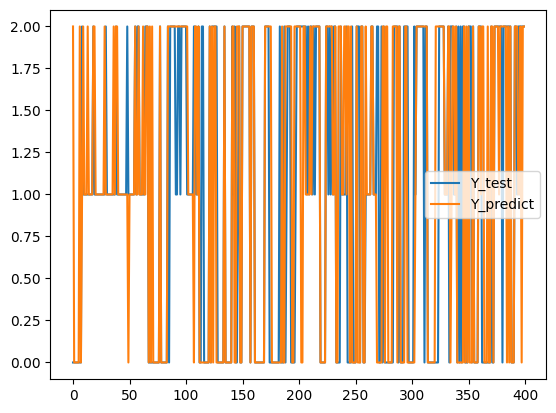

In [36]:

#plot 
plt.plot(Y_test)
plt.plot(Y_predict)
#plt.plot(Y_train)
#plt.plot(train)
plt.legend(['Y_test', 'Y_predict'])